In [5]:
import brian2 as b2
import pylab as plt
import numpy as np
%matplotlib inline 

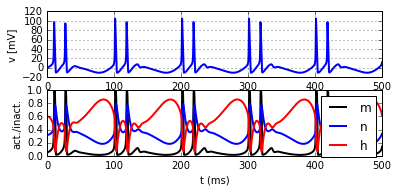

In [25]:
# neuron parameters
El = 10.6 * b2.mV
EK = -12 * b2.mV
ENa = 115 * b2.mV
gl = 0.3 * b2.msiemens
gK = 36 * b2.msiemens
gNa = 120 * b2.msiemens
C = 1 * b2.ufarad

I_freq=0.01
I_offset=0.5
I_amp=7.
tend=600
dt=.1

t = np.arange(0, tend, dt)
tmp = (I_amp*np.sin(2.0*np.pi*I_freq*t)+I_offset) * b2.uamp
curr = b2.TimedArray(tmp, dt=dt*b2.ms)
    
# forming HH model with differential equations
eqs = '''
I_e = curr(t) : amp
membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
    gl*(El-vm) + gK*n**4*(EK-vm) : amp
alphah = .07*exp(-.05*vm/mV)/ms    : Hz
alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
betam = 4*exp(-.0556*vm/mV)/ms : Hz
betan = .125*exp(-.0125*vm/mV)/ms : Hz
dh/dt = alphah*(1-h)-betah*h : 1
dm/dt = alpham*(1-m)-betam*m : 1
dn/dt = alphan*(1-n)-betan*n : 1
dvm/dt = membrane_Im/C : volt
'''

neuron = b2.NeuronGroup(1, eqs, method='exponential_euler')

# parameter initialization
neuron.vm = 0
neuron.m = 0.0529324852572
neuron.h = 0.596120753508
neuron.n = 0.317676914061

# tracking parameters
rec = b2.StateMonitor(neuron, ['vm', 'I_e', 'm', 'n', 'h'], record=True)

# running the simulation
b2.run(500*b2.msecond)

plt.subplot(311)
plt.plot(rec.t/b2.ms, rec.vm[0]/b2.mV, lw=2)

plt.xlabel('t [ms]')
plt.ylabel('v [mV]')
plt.grid()

plt.subplot(312)
traceall = np.append(rec.m[0], [rec.n[0], rec.h[0]])
nrmfactor = np.max(traceall)/b2.mV
plt.plot(rec.t/b2.ms, rec.m[0] / nrmfactor / b2.mV, 'black', lw=2)
plt.plot(rec.t/b2.ms, rec.n[0] / nrmfactor / b2.mV, 'blue', lw=2)
plt.plot(rec.t/b2.ms, rec.h[0] / nrmfactor / b2.mV, 'red', lw=2)
plt.xlabel('t (ms)')
plt.ylabel('act./inact.')
plt.legend(('m', 'n', 'h'))

In [12]:
#source code#
#http://webcache.googleusercontent.com/search?q=cache:Yqo3DXHJRbcJ:www.comodl.org/projects/neuronal-dynamics-book/repository/revisions/39e18dd1b83031f32a495a8a3fa5c4f0b40a5805/raw/neurodynex/hodgkin_huxley/HH.py+&cd=10&hl=en&ct=clnk&gl=us&client=safari
def do_plot(rec, title=None):
    """Plots a TimedArray for values I and v

    Args:
        rec (TimedArray): the data to plot
        v_threshold (float): plots a threshold at this level [mV]
        title (string): plot title to display
    """

    plt.subplot(311)
    plt.plot(rec.t/b2.ms, rec.vm[0]/b2.mV, lw=2)

    plt.xlabel('t [ms]')
    plt.ylabel('v [mV]')
    plt.grid()

    # find max of activation and inactivation variables
    traceall = np.append(rec.m[0], [rec.n[0], rec.h[0]])
    nrmfactor = np.max(traceall)/b2.mV

    plt.subplot(312)

    plt.plot(rec.t/b2.ms, rec.m[0] / nrmfactor / b2.mV, 'black', lw=2)
    plt.plot(rec.t/b2.ms, rec.n[0] / nrmfactor / b2.mV, 'blue', lw=2)
    plt.plot(rec.t/b2.ms, rec.h[0] / nrmfactor / b2.mV, 'red', lw=2)
    plt.xlabel('t (ms)')
    plt.ylabel('act./inact.')
    plt.legend(('m', 'n', 'h'))

    plt.grid()

    plt.subplot(313)
    plt.plot(rec.t/b2.ms, rec.I_e[0]/b2.uamp, lw=2)
    plt.axis((
        0,
        np.max(rec.t/b2.ms),
        min(rec.I_e[0]/b2.uamp)*1.1,
        max(rec.I_e[0]/b2.uamp)*1.1
    ))

    plt.xlabel('t (ms)')
    plt.ylabel('I (micro A)')

    if title is not None:
        plt.suptitle(title)

    plt.show()


def HH_Neuron(curr, simtime):

    """Simple Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        curr (TimedArray): Input current injected into the HH neuron
        simtime (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ['vm', 'I_e', 'm', 'n', 'h']
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 120 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = '''
    I_e = curr(t) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    '''

    neuron = b2.NeuronGroup(1, eqs, method='exponential_euler')

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.0529324852572
    neuron.h = 0.596120753508
    neuron.n = 0.317676914061

    # tracking parameters
    rec = b2.StateMonitor(neuron, ['vm', 'I_e', 'm', 'n', 'h'], record=True)

    # running the simulation
    b2.run(simtime)

    return rec


def HH_Step(I_tstart=20, I_tend=180, I_amp=7, tend=200):

    """Run the Hodgkin-Huley neuron for a step current input.

    Args:
        I_tstart (float): start of current step [ms]
        I_tend (float): start of end step [ms]
        I_amp (float): amplitude of current step [uA]
        tend (float): the simulation time of the model [ms]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ['vm', 'I_e', 'm', 'n', 'h']
    """

    # 1ms sampled step current
    tmp = np.zeros(tend) * b2.uamp
    tmp[int(I_tstart):int(I_tend)] = I_amp * b2.uamp
    curr = b2.TimedArray(tmp, dt=1.*b2.ms)

    rec = HH_Neuron(curr, tend * b2.ms)
    do_plot(
        rec,
        title="Step current",
    )

    return rec


def HH_Sinus(I_freq=0.01, I_offset=0.5, I_amp=7., tend=600, dt=.1):
    """
    Run the HH model for a sinusoidal current

    Args:
        tend (float): the simulation time of the model [ms]
        I_freq (float): frequency of current sinusoidal [kHz]
        I_offset (float): DC offset of current [nA]
        I_amp (float): amplitude of sinusoidal [nA]

    Returns:
        StateMonitor: Brian2 StateMonitor with input current (I) and
        voltage (V) recorded
    """

    # dt sampled sinusoidal function
    t = np.arange(0, tend, dt)
    tmp = (I_amp*np.sin(2.0*np.pi*I_freq*t)+I_offset) * b2.uamp
    curr = b2.TimedArray(tmp, dt=dt*b2.ms)

    rec = HH_Neuron(curr, tend * b2.ms)
    do_plot(
        rec,
        title="Sinusoidal current",
    )

    return rec


def HH_Ramp(I_tstart=30, I_tend=270, I_amp=20., tend=300, dt=.1):
    """
    Run the HH model for a sinusoidal current

    Args:
        tend (float): the simulation time of the model [ms]
        I_tstart (float): start of current ramp [ms]
        I_tend (float): end of the current ramp [ms]
        I_amp (float): final amplitude of current ramp [uA]

    Returns:
        StateMonitor: Brian2 StateMonitor with input current (I) and
        voltage (V) recorded
    """

    # dt sampled sinusoidal function
    t = np.arange(0, tend, dt)
    tmp = np.zeros_like(t)
    index_start = np.searchsorted(t, I_tstart)
    index_end = np.searchsorted(t, I_tend)
    tmp[index_start:index_end] = np.arange(0, index_end-index_start, 1.0) \
        / (index_end-index_start) * I_amp
    curr = b2.TimedArray(tmp * b2.uamp, dt=dt*b2.ms)

    rec = HH_Neuron(curr, tend * b2.ms)
    do_plot(
        rec,
        title="Sinusoidal current",
    )

    return rec
